<a href="https://colab.research.google.com/github/OweenCesar/Notebooks/blob/main/Linear_Regression_Advertising_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("/content/Advertising.csv")

In [79]:
data.head(10)


,Unnamed: 0,TV,radio,newspaper,sales
0,1,0.969852,0.981522,1.942339,22.1
1,2,-1.197376,1.082808,0.754709,10.4
2,3,-1.516155,1.528463,1.947267,9.3
3,4,0.052050,1.217855,1.415051,18.5
4,5,0.394182,-0.841614,1.410123,12.9
5,6,-1.615408,1.731034,2.228159,7.2
6,7,-1.045577,0.643905,-0.309722,11.8
7,8,-0.313437,-0.247406,-0.896145,13.2
8,9,-1.616576,-1.429069,-1.418505,4.8
9,10,0.616043,-1.395307,-0.423064,10.6


In [4]:
data.shape

(200, 5)

In [5]:
data.isna().sum()

,0
Unnamed: 0,0
TV,0
radio,0
newspaper,0
sales,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
import matplotlib.pyplot as plt


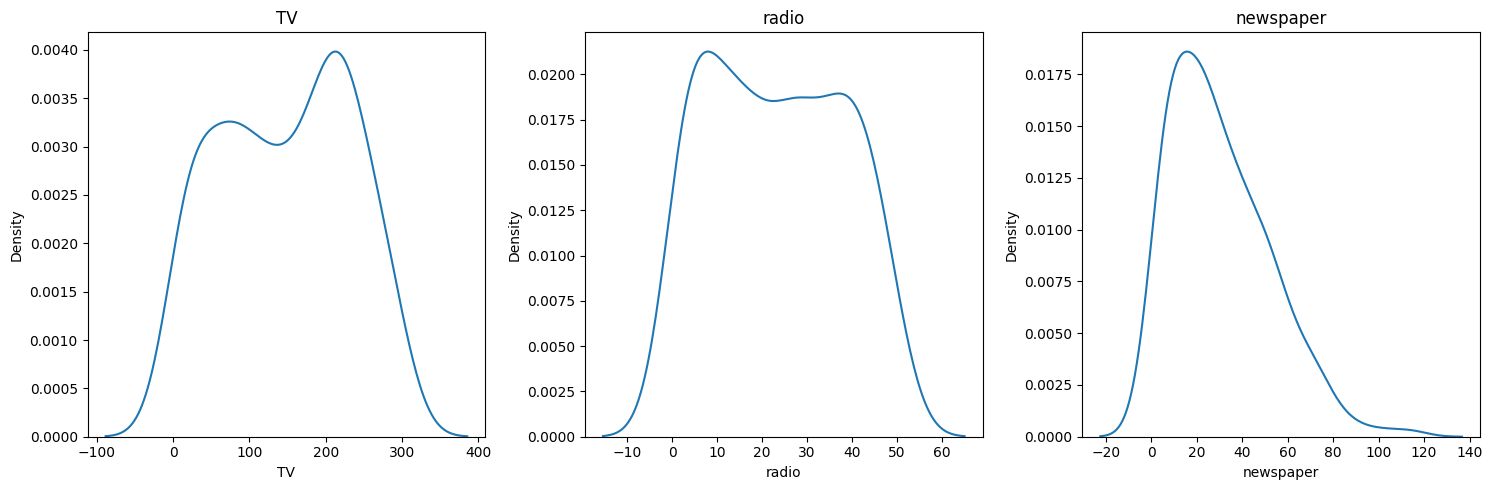

In [9]:

columns_to_plot = ['TV', 'radio', 'newspaper']
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_plot), figsize=(15, 5))

for ax, column in zip(axes, columns_to_plot):
    sns.kdeplot(data=data[column], ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

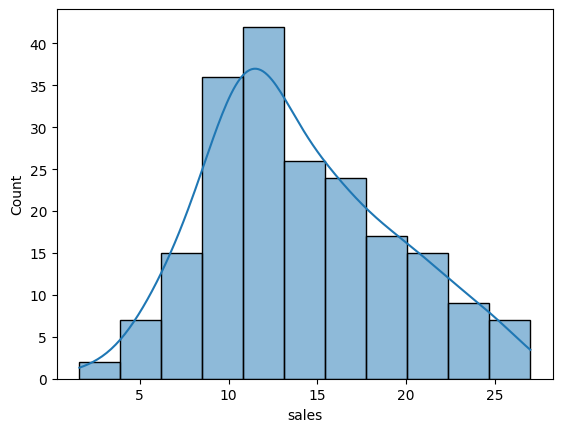

"\nThe distribution of the sales column is slightly right-skewed (aka positively skewed).\n\nMost of the sales values are concentrated between: 8 and 15.\n\nThere's a longer tail going off to the right (towards 25+), meaning some unusually high sales values but their count is low.\n"

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['sales'], kde=True)
plt.show()

"""
The distribution of the sales column is slightly right-skewed (aka positively skewed).

Most of the sales values are concentrated between: 8 and 15.

There's a longer tail going off to the right (towards 25+), meaning some unusually high sales values but their count is low.
"""

<Axes: >

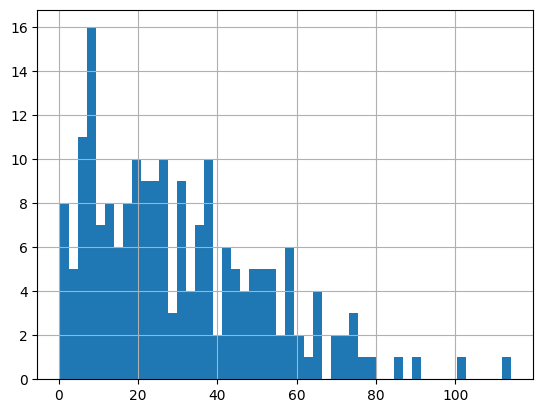

In [18]:
data['newspaper'].hist(bins=50)

In [40]:
from scipy import stats
import numpy as np

columns_to_plot = ['TV', 'radio', 'newspaper']

for column in columns_to_plot:
  z_scores = np.abs(stats.zscore(data[column]))  # Replace 'price' with your target
  outliers = np.where(z_scores > 3)
  if len(outliers[0]) > 0:
    print(f"Outliers were detected on the {column} column , Outliers Indices:  {outliers}")
    print(data.loc[outliers[0], column])
    mean_value = data[column].mean()
    data.loc[outliers[0], column] = mean_value
    print( data.loc[outliers[0], column] )

In [46]:
from scipy import stats
import numpy as np

columns_to_plot = ['TV', 'radio', 'newspaper']

for column in columns_to_plot:
  z_scores = np.abs(stats.zscore(data[column]))  # Replace 'price' with your target
  outliers = np.where(z_scores > 3)
  if len(outliers[0]) > 0:
    print(f"Outliers were detected on the {column} column , Outliers Indices:  {outliers}")
  else:
    print(f"No outliers were detected in the column ----> {column}")

No outliers were detected in the column ----> TV
No outliers were detected in the column ----> radio
No outliers were detected in the column ----> newspaper


In [51]:
my_data = data.drop('Unnamed: 0', axis = 1 )



# **We should not forget that:**
With the correlations matrix, we are trying to find associatiosns between the features and what we are trying to predict. We could decide which columns to still keeping when we do feature engineering)

The limitations of correlations matrix:
- It is only helpful for LR tasks.
- A weak correlation does not always mean that we must drop that column!




In [53]:
my_data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.049440,0.782224
radio,0.054809,1.000000,0.345313,0.576223
newspaper,0.049440,0.345313,1.000000,0.217856
sales,0.782224,0.576223,0.217856,1.000000


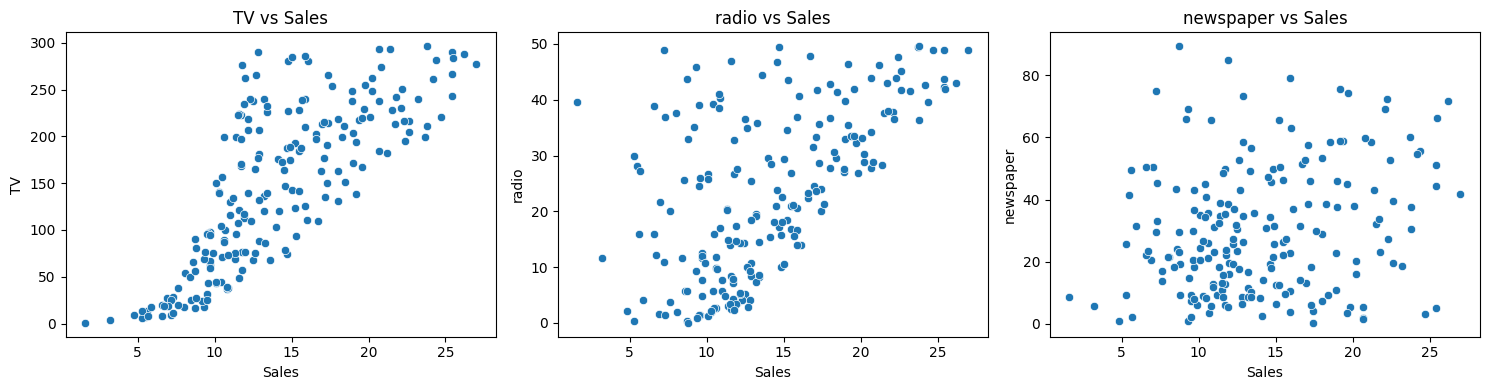

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['TV', 'radio', 'newspaper']

plt.figure(figsize=(15, 4))

for i, column in enumerate(columns_to_plot):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=my_data, x='sales', y=column)
    plt.title(f'{column} vs Sales')
    plt.xlabel('Sales')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


##  **Thoughts on our previous plots:**
  
- TV vs Sales and Radio show clearly a positive correlation, while with TV , we have a strong linear relationship, on the other hand, with radio we have a moderate linear relationship. The trend here is less constant, in comparison with TV.

> Añadir blockquote



- When it comes to newspaper vs sales, there is not any specific or clear relationship, all the points are actually dispersed. No clear trend

--> We could predict with and without newspaper.


In [59]:
# Moving to modeling
# Mean of each column becomes ≈ 0

# Standard deviation of each column becomes ≈ 1

from sklearn.preprocessing import StandardScaler

features = ['TV', 'radio', 'newspaper']
scaler = StandardScaler()
my_data[features] = scaler.fit_transform(my_data[features])



In [62]:
my_data


,TV,radio,newspaper,sales
0,0.969852,0.981522,1.942339,22.1
1,-1.197376,1.082808,0.754709,10.4
2,-1.516155,1.528463,1.947267,9.3
3,0.052050,1.217855,1.415051,18.5
4,0.394182,-0.841614,1.410123,12.9
...,...,...,...,...
195,-1.270941,-1.321031,-0.787731,7.6
196,-0.617035,-1.240003,-1.068622,9.7
197,0.349810,-0.942899,-1.152397,12.8
198,1.594565,1.265121,1.794501,25.5


In [63]:
from sklearn.model_selection import train_test_split

X = my_data[['TV', 'radio', 'newspaper']]  # features
y = my_data['sales']  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [66]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [67]:
model.fit(X_train, y_train)

LinearRegression()

In [68]:
y_pred = model.predict(X_test)


In [72]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 3.16


In [73]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

R²: 0.90


In [74]:
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

RMSE: 1.78


# Our metrics show that:
- MSE = 3.16; Very low → Squared errors are small, meaning predictions are close to actual sales
- R^2 = 0.90 ; Vey well fit!
- RMSE = 1.78;  Predictions are off by ~1.78 units (e.g., dollars) on average.

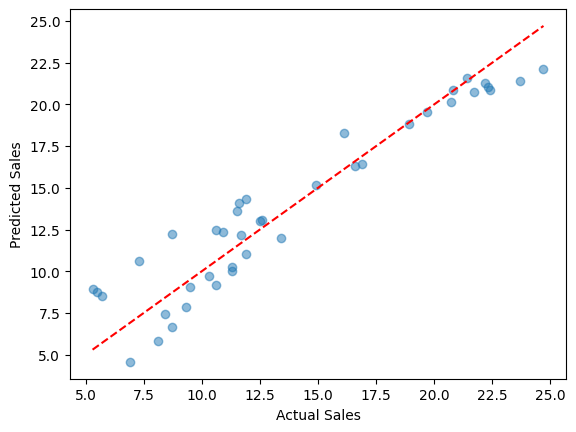

In [75]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.show()

# Most of the points are very very close to the red line which indicates accurate predictions.
# We dont see any cloud of scatters, therefoe, the error is low.

## To make new predictions:
We used StandardScaler before (so we train our model with transformed data). In order to make predictions with new data we must transform them in the same way as we did before, so it can be compatible with what the model has learned

In [91]:
new_data = [[230.1, 37.8, 69.2]]
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)

print(prediction)


[20.59896899]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [92]:
predicted_sales = model.predict(new_data_scaled)
print(f"Predicted Sales: {predicted_sales[0]:.2f}")


Predicted Sales: 20.60


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Insights:
- We used the new data : [[230.1, 37.8, 69.2]] to check a new prediction, the real value should be 22.1 but the model's prediction was 20.6 , therefore the difference is around 1.5 which is acceptable since our RMSE is 1.78
In other words it is  within the average error range.  